# Paso 1: Cargar y explorar los datos

In [86]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import mlflow
import joblib
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge

In [87]:
# Configurar MLflow
mlflow.set_tracking_uri("http://localhost:5000")
mlflow.set_experiment("toyota_project")

<Experiment: artifact_location='mlflow-artifacts:/833447958012810940', creation_time=1747431455974, experiment_id='833447958012810940', last_update_time=1747431455974, lifecycle_stage='active', name='toyota_project', tags={}>

In [88]:
# Cargar dataset
df = pd.read_csv(
    "https://raw.githubusercontent.com/dodobeatle/dataeng-datos/refs/heads/main/ToyotaCorolla.csv",
    encoding="utf8",
    engine="python"
)
pd.set_option('display.max_columns', None)

df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,0,2000,3,4,5,210,1165,0,1,3,1,1,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,0,2000,3,4,5,210,1165,0,1,3,1,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,0,2000,3,4,5,210,1165,1,1,3,1,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,0,2000,3,4,5,210,1170,1,1,3,1,1,1,1,0,1,0,1,1,1,0,1,0,1,0,0,0


In [89]:
# Ver la forma (cantidad de filas y columnas)
df.shape

(1436, 37)

In [90]:
# Ver info general del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Automatic         1436 non-null   int64 
 11  cc                1436 non-null   int64 
 12  Doors             1436 non-null   int64 
 13  Cylinders         1436 non-null   int64 
 14  Gears             1436 non-null   int64 
 15  Quarterly_Tax     1436 non-null   int64 
 16  Weight            1436 non-null   int64 
 17  Mfr_Guarantee 

In [91]:
# Ver resumen estadístico de columnas numéricas
df.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,4.033426,4.0,5.026462,87.122563,1072.45961,0.409471,0.895543,3.815460,0.81337,0.970752,0.722841,0.508357,0.056407,0.294568,0.218663,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,0.952677,0.0,0.188510,41.128611,52.64112,0.491907,0.305959,3.011025,0.38975,0.168559,0.447751,0.500104,0.230786,0.456007,0.413483,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,2.000000,4.0,3.000000,19.000000,1000.00000,0.000000,0.000000,3.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,3.000000,4.0,5.000000,69.000000,1040.00000,0.000000,1.000000,3.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,4.000000,4.0,5.000000,85.000000,1070.00000,0.000000,1.000000,3.000000,1.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,5.000000,4.0,5.000000,85.000000,1085.00000,1.000000,1.000000,3.000000,1.00000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,5.000000,4.0,6.000000,283.000000,1615.00000,1.000000,1.000000,36.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Paso 2: Limpieza del dataset

In [ ]:
df.columns.tolist()

['Id',
 'Model',
 'Price',
 'Age_08_04',
 'Mfg_Month',
 'Mfg_Year',
 'KM',
 'Fuel_Type',
 'HP',
 'Met_Color',
 'Automatic',
 'cc',
 'Doors',
 'Cylinders',
 'Gears',
 'Quarterly_Tax',
 'Weight',
 'Mfr_Guarantee',
 'BOVAG_Guarantee',
 'Guarantee_Period',
 'ABS',
 'Airbag_1',
 'Airbag_2',
 'Airco',
 'Automatic_airco',
 'Boardcomputer',
 'CD_Player',
 'Central_Lock',
 'Powered_Windows',
 'Power_Steering',
 'Radio',
 'Mistlamps',
 'Sport_Model',
 'Backseat_Divider',
 'Metallic_Rim',
 'Radio_cassette',
 'Tow_Bar']

In [93]:
# Ver la cantidad de valores nulos por columna
df.isnull().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [97]:
# Filtrar filas con valores negativos en variables clave
df[(df["KM"] < 0) | (df["Weight"] < 0) | (df["Age_08_04"] < 0) | (df["Price"] < 0)]

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Automatic,cc,Doors,Cylinders,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar


# Paso 3: Análisis exploratorio de datos

In [98]:
# Ver columnas categóricas
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_cols

['Model', 'Fuel_Type']

In [102]:
# Ver frecuencia de valores en cada variable categórica (ejemplo con primera variable)
df[categorical_cols[0]].value_counts()

Model
TOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-Doors      107
TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-Doors       83
TOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-Doors         79
TOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-Doors        70
TOYOTA Corolla 1.6 16V SEDAN LINEA TERRA 4/5-Doors        43
                                                        ... 
TOYOTA Corolla 1.6 16V HATCHBACK LINEA LUNA 2/3-Doors      1
TOYOTA Corolla 1.6 Linea Terra Comfort 2/3-Doors           1
TOYOTA Corolla 1.3 Linea Terra 4/5-Doors                   1
?TOYOTA Corolla 1800 T SPORT VVT I 2/3-Doors               1
TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors              1
Name: count, Length: 372, dtype: int64

In [101]:
df[categorical_cols[1]].value_counts()

Fuel_Type
Petrol    1264
Diesel     155
CNG         17
Name: count, dtype: int64

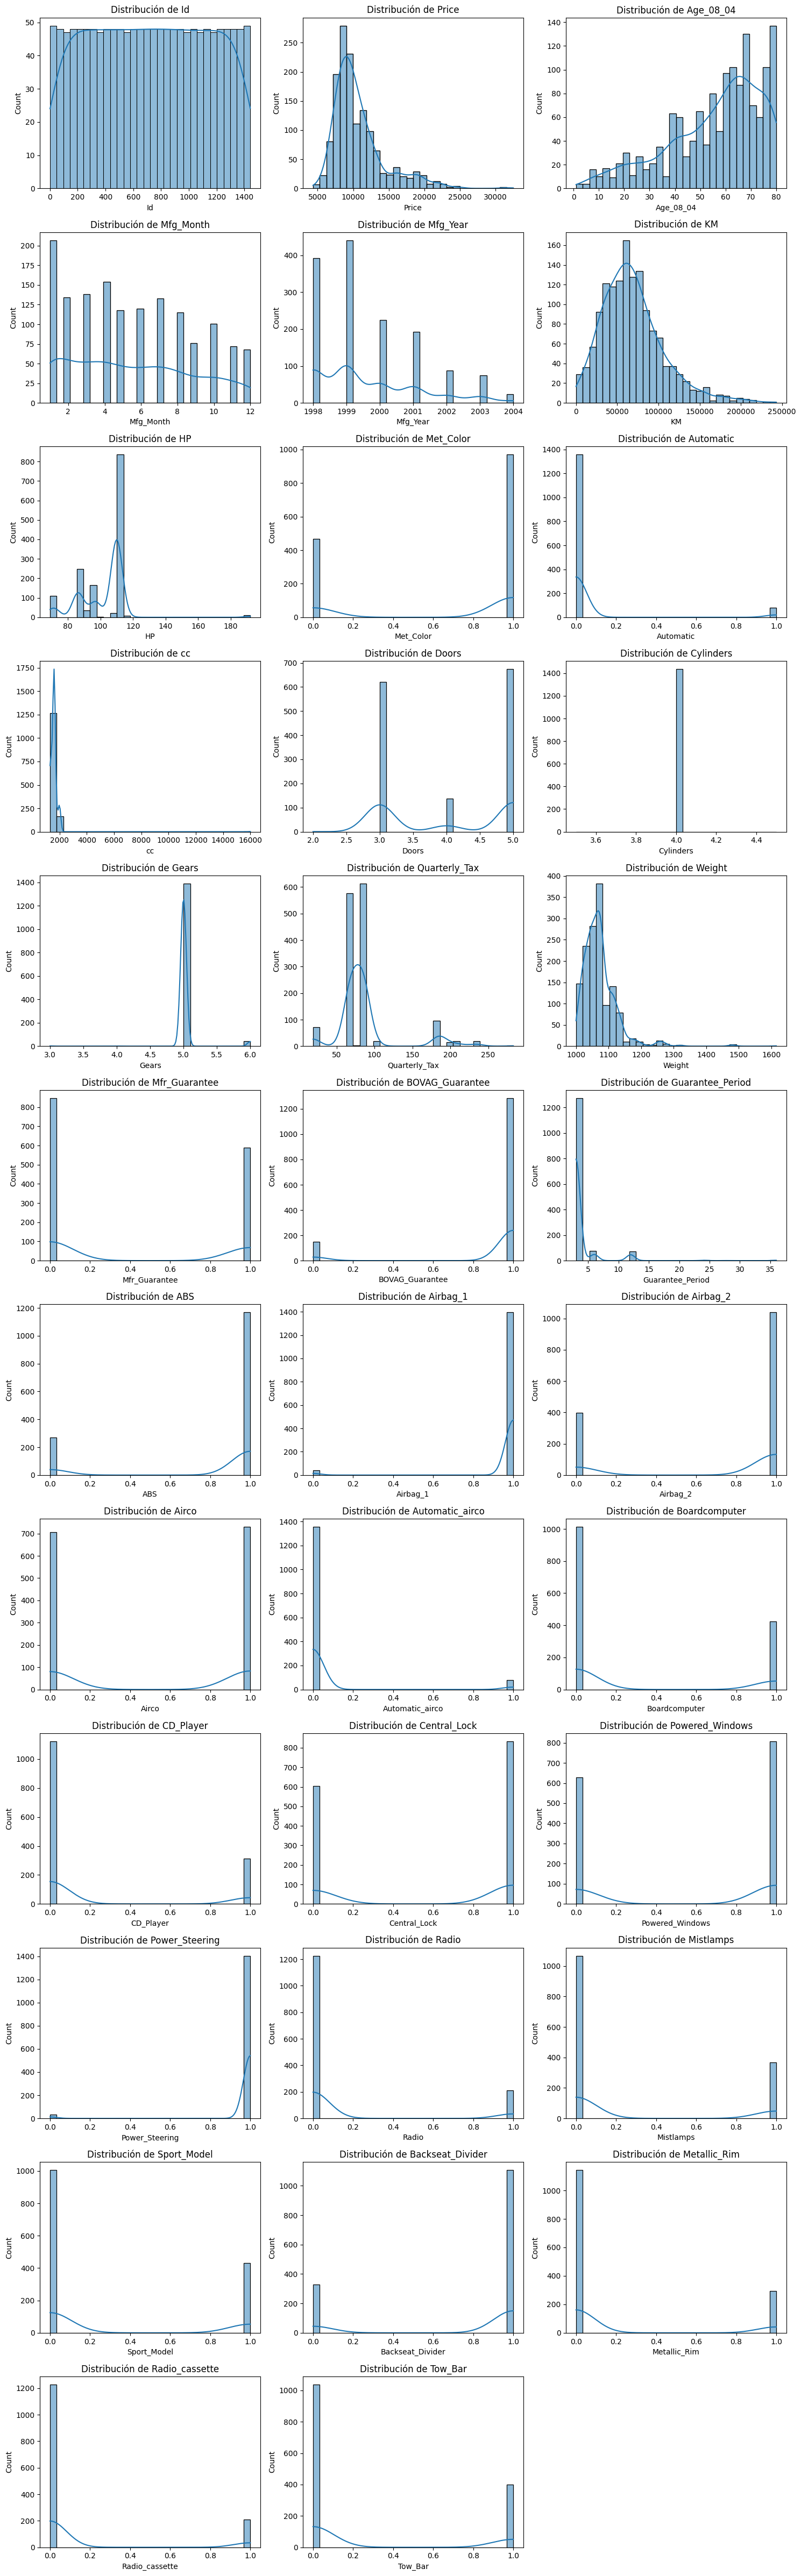

In [104]:
# Distribucion de variables numéricas
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Definir cantidad de filas y columnas para los subplots
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols  # redondeo hacia arriba

plt.figure(figsize=(5*n_cols, 4*n_rows))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribución de {col}')
    plt.tight_layout()

plt.show()

In [94]:
# =========================
# 1. EXPLORACIÓN DE DATOS
# =========================

df_eda = df.copy()

df_eda["Age_08_04_calculado"] = (2004 - df_eda["Mfg_Year"]) * 12 + (8 - df_eda["Mfg_Month"])

features_selected = ["Price", "Age_08_04_calculado", "KM", "cc", "Doors", "Weight","Quarterly_Tax"]

df_selected = df_eda[features_selected].copy()

# print(df_selected.info())

# print(df_selected.describe())

print(df_selected.describe().T)

# print(df_selected.head(n=10))

                      count          mean           std     min      25%  \
Price                1436.0  10730.824513   3626.964585  4350.0   8450.0   
Age_08_04_calculado  1436.0     54.947075     18.599988     0.0     43.0   
KM                   1436.0  68533.259749  37506.448872     1.0  43000.0   
cc                   1436.0   1576.855850    424.386770  1300.0   1400.0   
Doors                1436.0      4.033426      0.952677     2.0      3.0   
Weight               1436.0   1072.459610     52.641120  1000.0   1040.0   
Quarterly_Tax        1436.0     87.122563     41.128611    19.0     69.0   

                         50%       75%       max  
Price                 9900.0  11950.00   32500.0  
Age_08_04_calculado     60.0     69.00      79.0  
KM                   63389.5  87020.75  243000.0  
cc                    1600.0   1600.00   16000.0  
Doors                    4.0      5.00       5.0  
Weight                1070.0   1085.00    1615.0  
Quarterly_Tax           85.0     8

In [95]:
# Filtro por dominio
df_selected = df_selected[
    (df_selected["Price"] > 1000) & (df_selected["Price"] < 15000) &
    (df_selected["Age_08_04_calculado"] > 30) & (df_selected["Age_08_04_calculado"] < 80) &
    (df_selected["KM"] > 0) & (df_selected["KM"] < 140000) &
    (df_selected["cc"] > 600) & (df_selected["cc"] < 2500) &
    (df_selected["Weight"] > 800) & (df_selected["Weight"] < 1200) &
    (df_selected["Doors"].isin([3, 4, 5])) &
    (df_selected["Quarterly_Tax"] > 30) & (df_selected["Quarterly_Tax"] < 120)

]